In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### < 데이터셋 개요>
- Survived: 생존 여부
    - 0 = No
    - 1 = Yes
- pclass: 티켓 등급
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Name : 이름, 사회적등급
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [271]:
data = pd.read_csv('data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [272]:
# 컬럼을 소문자로 만들어 주세요
# 방법1
data.columns = data.columns.str.lower()
data
# 방법2 - rename 이용
# data.rename(columns = str.lower)

# 방법 3 - map이용
# data.columns = data.columns.map(str.lower)

# 방법 4
# new_cols = list()
# for col in data.columns:
#     new_cols.append(col.lower())

# data.columns = new_cols
# data


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### 결측치 확인
    - 컬럼별 갯수
    - 데이터셋의 크기가 작은 경우는 결측치가 있는 레코드를 삭제하지 않음
        - 대체하는 방식으로 전처리

In [273]:
# 본 데이터프레임의 크기
data.shape

(891, 12)

In [274]:
# 값이 없으면 True - 1 / False - 0 
# isnull()에 대한 총합을 알면 결측치 갯수임을 알 수 있다.
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [275]:
# 전체 데이터 대비 결측치의 비중
# 결측치 / 891 (전체데이터의 개수) * 100 = 비율
data.isnull().sum() / 891 * 100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

In [276]:
# 불필요한 컬럼 제거
# 티켓컬럼 제거

# 방법1
data = data.drop(['ticket'], axis = 1)
data

# 방법2
# del data['ticket']

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [277]:
# 누락 확인

# 티켓이 데이터 컬럼 값에 있습니까? -> False
print('ticket' in data.columns)

# 요금이 데이터 컬럼 값에 있습니까? -> True
print('fare' in data.columns)

False
True


In [278]:
# ticket 컬럼을 누락시킨 csv 파일을 외부로 내보내기
# 단 그냥 to_csv를 할 경우 자동으로 csv에 로우명을 매기기 때문에
# 추후 다시 import 할 때 Unnamed : 0 컬럼이 들어옵니다.
# 이를 방지학디 위해 index = Fals를 주면 Unnamed 를 안들어 오게 할 수 있습니다.
data.to_csv('./ticket_deleted_titanic.csv', index = False)

#### Cabin 데이터를 활용하여 유도변수 생성
- 개별 객실 번호는 의미가 없음(123, 456 ...)
- cabin 데이터의 첫 글자가 deck(구역)을 의미
- 유도변수 : deck컬럼 추가
- deck 컬럼에 추가될 자료 : A, B, C, D, E, F, G, T, unknown
12:07
- cabin 컬럼의 각 값에 적용할 처리
    - 1)
        - 값의 첫 번째 문자가 deck list에 있으면 해당 deck을 반환
        - 없으면(NaN) deck list의 unknown 반환
    - 2)
        - 첫 번째 문자 반환
        - 없으면 다른 것 반환

NaN
1. type = float
2. 다른값으로 대체해서 처리
3. str으로 변경

    NaN은 데이터 타입이 float입니다. (type(np.NaN))

In [279]:
# NaN
# 1. type = float
# 2. 다른 값으로 대체해서 처리
# 3. str으로 변경

deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
sample = ['C123', np.nan, 'D201', np.nan, 'F999']
# result = ['C', 'unknown', 'D', 'unknown', 'F']

In [280]:
# 함수를 정의해서, apply나 map을 통해 유도변수로 교체해주세요.
# 접근 방법 모름

def cabin_to_deck(value):
    deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']

    # NaN인지 검사
    if type(value)==type(np.nan):
        return 'unknown'

    # NaN가 아니면 덱 종류만 리턴
    elif value[0] in deck_list:

    # 덱 리스트에 분류된 덱이 맞는지 체크
        return value[0]
    else:
        return 'unknown'

In [281]:
# 컬럼명은 deck로 해주시면 됩니다.
data['deck'] = data['cabin'].map(cabin_to_deck)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C


#### Name 데이터를 활용하여 유도변수 생성
- 개별 이름은 모델 예측에 유의미한 변수가 아니다.
- 대표 특성을 찾을 수 있는 범주 데이터를 추출할 수 있다.
- Mr, Ms, Miss, Master ...
- 추출 하여 title 컬럼으로 추가
- 첫번째 방법. split() 두번 사용하여 처리
- 두번째 방법. 정규식을 사용하여 처리
    - ver1
        - 정규식 패턴 생성에 사용할 문자열 : Sir, Mr, Don, Major, Capt, Jonkheer, Rev, Col, Dr, Mrs, Countess, Dona, Mme, Ms, Miss, Mlle, Master
        - 정규식 사용 순서 : 원본 문자열에서 split 결과의 1번 인덱스 값
    - ver2
        - 정규식 패턴 : [a-zA-Z]+\.

In [282]:
# split을 이용하여, name컬럼의 값들을 칭호만 남겨서 저장해주세요
# 새로운 컬럼인 splited_name 컬럼에 저장
# ★★★★★ 수업끝나고 연습
# tip : 한번에 구현하려고 하지말고 단계적으로 구분해봅시다.
# tip : 스플릿으로 자르고 나면 리스트형으로 나옵니다. 그 말은 리스트의 0,1,2 번째 순서가 있다는 얘기입니다.

# 공백으로 스플릿
def name_split(value):
    return value.split()[1][:-1]

In [283]:
# 쉼표와 점으로 스플릿
def comma_split(value):
    return value.split(',')[1].split('.')[0]

In [284]:
data['splited_name'] = data['name'].apply(name_split)
# data['name'].apply(comma_split)

In [285]:
# 람다함수로 접근하는 방법
# tip : 람다함수는 일회용익명함수로 
# def 함수보다 메모리를 적게 차지하고 사용종료시 힙에서 빠지게됩니다.
data['name'].apply(lambda x: x.split()[1][:-1])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

In [286]:
data['splited_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Planke', 'Don', 'Rev', 'Billiard',
       'de', 'Walle', 'Dr', 'Pelsmaeker', 'Mulder', '', 'Steen', 'Carlo',
       'Mme', 'Impe', 'Ms', 'Major', 'Gordon', 'Messemaeker', 'Mlle',
       'Col', 'Capt', 'Velde', 'th', 'Shawah', 'Jonkheer', 'Melkebeke',
       'Cruyssen'], dtype=object)

In [287]:
# 정규표현식 사용을 위해 import re 실행
# regular express(정규표현식) 줄여서  re
import re

In [288]:
# 정규표현식은 re.compile('내부 패턴', re.I)를 이용하면 해당 단어만 뽑아줍니다.
# 이를 위해서 반드시 먼저 import re 가 실행되어 있어야 합니다.
# 단어 리스트를 가지고 정규식 패턴 적용

def get_title(name):

    # 둘 이상의 단어를 타겟으로 잡을때는 |(쉬프트 + 역슬래시)를 사용합니다.
    pattern = re.compile('Sir|Mrs|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mr|\
        Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.I)

    # 정규식변수.search(타겟) => 타겟에서 패턴에 해당하는 자료가 있는지 조사

    result = pattern.search(name)
    # print(result)
    # print(result.group())
    if result:
        return result.group().lower()
    else:
        str(np.nan)

In [289]:
get_title('Donald duck, revive brave')

'don'

In [290]:
# 위 정규식 실행 함수를 name에 적용하면 호칭만 나옵니다.
data['title'] = data['name'].apply(get_title)

In [291]:
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr,mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr,mr


In [292]:
# re를 사용하지 않는 경우는 팬더스에서 .str.extract('패턴')를 사용한다.
# expand-True -> Df / expand-False -> Series
# a-zA-Z -> 대소문자 상관없이 알파벳 다 들고오겠습니다. 라는 의미
data['name'].str.extract('([a-zA-Z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

In [293]:
# 호칭별 개수
data['title'].value_counts()

mr          493
miss        177
mrs         123
master       39
dr           16
col          12
ms            8
rev           6
don           4
mme           4
sir           2
major         2
mlle          2
capt          1
jonkheer      1
Name: title, dtype: int64

* 범주 재설정

    capt - Officer<br>
    col - Officer<br>
    major - Officer<br>
    dr - Officer<br>
    jonkheer - Royalty<br>
    rev - Officer<br>
    countess - Royalty<br>
    dona - Royalty<br>
    lady - Royalty<br>
    don - Royalty<br>
    sir - Officer<br>
    mr - Mr<br>
    mme - Mrs<br>
    ms - Mrs<br>
    mrs - Mrs<br>
    miss - Miss<br>
    mlle - Miss<br>
    master - Master<br>
    nan - Mr(최빈값)<br>

In [294]:
# name 데이터를 활용하여 생성한 유도변수 처리
title_map = {
    "capt":"Officer",
    "col":"Officer",
    "major":"Officer",
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    'sir' : 'Officer',
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

In [295]:
# data['title]에 들어있던 요소를 위의 규칙을 따라서 내부요소 변경해주기
data['title'] = data['title'].map(title_map)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr,Mr


#### 결측치 처리 - Age
- 미성년(Master, Miss)
- title 별 평균으로 age 결측치 대체
- transform
- (참고)사용자정의함수 : 매개변수 3개(타이틀별평균, 데이터, 타이틀리스트)

In [296]:
# age 컬럼 중 null이 들어온 컬럼 개수를 구해주세요
data.age.isnull().sum()

177

In [297]:
# 먼저 나이의 평균을 구해봅시다.

# 방법1
data['age'].mean()

# 방법2
# data['age'].transform(mean)

# 방법3
# 함수이용 or 람다함수 이용

29.69911764705882

In [298]:
# title별 age의 평균값
data.groupby('title')[['age']].mean()

,age
title,
Master,4.362000
Miss,21.555556
Mr,32.346457
Mrs,35.659292
Officer,37.742857
Royalty,48.200000


In [299]:
# groupby 다음 사용하는 transform은 기존값을 무시하고, 집계함수로 대체합니다.
# 이 값을 모든곳이 아닌 결측치에만 채워주면 됩니다.
# title 컬럼을 기준으로 묶은 자료들의 'age'컬럼 평균치로
# 원래 'age'에 있던 결측치를 대신하기 위해 fillna 를 상요해서 채웁니다.
# transform(max, median, mean 등 이용가능합니다.)
missing_val = data.groupby('title')['age'].transform('mean')

In [300]:
data['age'].fillna(missing_val, inplace = True)


In [301]:
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,unknown,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,unknown,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,C,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,unknown,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S,unknown,Rev,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S,B,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.555556,1,2,23.4500,NaN,S,unknown,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C,C,Mr,Mr


In [302]:
# 결측치 유무 재확인
data.isnull().sum()

passengerid       0
survived          0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
fare              0
cabin           687
embarked          2
deck              0
splited_name      0
title             1
dtype: int64

#### Age 데이터를 범주형 데이터로 변경
- 나이 숫자값 자체로는 의미가 적다.
- 연령대로 구분하는 것이 더 의미가 있는 구분값
- 구간
    -  ~ 20
    - 20 ~ 40
    - 40 ~ 60
    - 60 ~
- 개수 : 4개
- pd.cut / np.digitize

In [303]:
# 사용자 정의함수
def age_class(value):
    if value < 20:
        return 'under 20'

    elif value < 40:
        return '20-40'

    elif value < 60:
        return '40-60'

    else:
        return 'over 60'

In [304]:
data['age_class'] = data['age'].apply(age_class)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S,unknown,Mr,Mr,20-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C,C,Mrs,Mrs,20-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S,unknown,Miss,Miss,20-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S,C,Mrs,Mrs,20-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S,unknown,Mr,Mr,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S,unknown,Rev,Officer,20-40
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S,B,Miss,Miss,under 20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.555556,1,2,23.4500,NaN,S,unknown,Miss,Miss,20-40
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C,C,Mr,Mr,20-40


In [305]:
# 연령대별 생존비율
# stacked bar chart

In [306]:
# 연령대별로 데이터가 몇 개가 있는지
data['age_class'].value_counts()

20-40       560
under 20    168
40-60       137
over 60      26
Name: age_class, dtype: int64

In [307]:
# 그룹바이를 이용해 지위별 생존/사망자별 인원수 출력
age_classed_data = data.groupby(['age_class', 'survived', 'sex'])[['survived']].count().copy()

In [308]:
# 그룹바이를 이용해 연령대별 생존/사망자별 인원수 출력
data.groupby(['title', 'survived', 'sex'])[['survived']].count()

survived
title   survived sex             
Master  0        male          17
        1        male          22
Miss    0        female        55
        1        female       124
Mr      0        male         416
        1        male          77
Mrs     0        female        26
                 male           7
        1        female        99
                 male           3
Officer 0        male          25
        1        female         8
                 male           6
Royalty 0        male           3
        1        female         1
                 male           1

In [311]:
# barplot 그리기, stackes 형태로 그리기
# 데이터프레임에 바로 plot(), hist()등을 사용하면 실제로 그려집니다.
# survived를 x축 / 나이정보를 y축 으로 두기위해 unstack()실행

barplot_data = age_classed_data.unstack(0)

In [312]:
# 멀티인덱스로 인해 범례가 보기 좋지 않으므로 소거
barplot_data.columns.names = ["", ""]

<AxesSubplot:xlabel='survived,sex'>

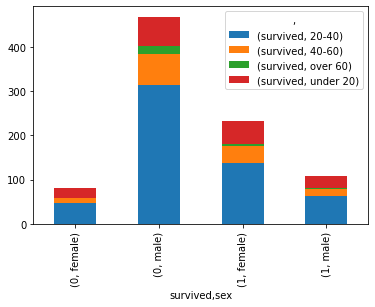

In [313]:
barplot_data.plot(kind='bar', stacked=True)

#### 성별별 생존자, 탑승표 등급별 생존자 분석

<AxesSubplot:xlabel='survived'>

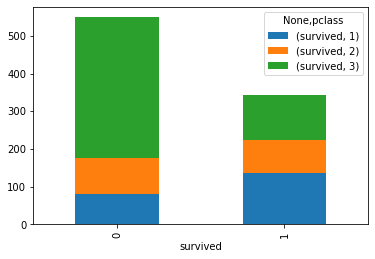

In [ ]:
# 탑승표, 등급별 생존자/사망사 시각화
# 1. 생존자와 사망자를 탑승표로 분류하여 가공
# 2. 차트생성

#상관도만으로는 볼수없는 인사이트를 각종 유도변수로 알아낼수 있었다.

pclassed_data = data.groupby(['pclass', 'survived'])[['survived']].count().copy()

pclassed_data.unstack(0).plot(kind = 'bar', stacked = True)